In [1]:
    """
    This is my exploratory data analysis of the National Park Service's data on species location, names, and number of observations.
    I will be using the pandas library to manipulate the data and matplotlib to visualize it.
    
    I would first like to see the number of species in each park, and then the number of observations of each species in each park.
    

        First Step  : I will import the data and take a look at it.
        Second Step : Then the data needs cleaned and organized.
        Third Step  : I then will find the unique species in each park.
        Fourth Step : The unique species in the park will then be used to find their count number.
        Fifth Step  : Then I will design an appropriate visualization to display the data.
        
    I would also like to see the number of species in each category, and the number of observations of each species in each category.
    
        First Step  : I will find the unique species in each category, and get their population number.
        Second Step : Then I will research more about the different parks to where the species are located.
        Third Step  : Will try to determine a correlation between species and their climates/locations.
        Fourth Step : Finally I will work to design good visualizations for this information.
        
    Another statistic i'm interested in is the number of predators and their effect of the number of observations of other species, mainly prey.

        First Step  : I will find the unique species in each category, and get their population number.
        Second Step : We need to determine the predator species and their prey.
        Third Step  : Now we can use these numbers to find the correlation between the predator numbers and their prey.
        Fourth Step : I will work to design some visualizations that help people understand the data better.
        
    After I find these statistics, I will use them to create a helpful dashboard integrating all the information.
    """

"\nThis is my exploratory data analysis of the National Park Service's data on species location, names, and number of observations.\nI will be using the pandas library to manipulate the data and matplotlib to visualize it.\n\nI would first like to see the number of species in each park, and then the number of observations of each species in each park.\n\n\n    First Step  : I will import the data and take a look at it.\n    Second Step : Then the data needs cleaned and organized.\n    Third Step  : I then will find the unique species in each park.\n    Fourth Step : The unique species in the park will then be used to find their count number.\n    Fifth Step  : Then I will design an appropriate visualization to display the data.\n    \nI would also like to see the number of species in each category, and the number of observations of each species in each category.\n\n    First Step  : I will find the unique species in each category, and get their population number.\n    Second Step : The

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the data
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')

# Inspect each dataframe
#print(observations.head())
#print(species_info.head())
#print(observations.dtypes)
#print(species_info.dtypes)

In [22]:
"""
    These Functions will be used later when we take inputs from the user to help them to navigate the data. This way they can find the information they need.
    They will also allow us to translate their inputs to the correct data in the data frame.
    This is necessary because the first data frame uses scientific names, and the second uses either common names or scientific names.
    Since we can translate between the two, we can display data from the data frames using common or scientific inputs.
    These will greatly speed up our retrieval of data from the data frames.
"""

def find_parks_by_animal(animal):
    """
    This function finds the parks in which a specific animal is located.
    """
    
    return observations[observations['scientific_name'] == animal]['park_name'].unique()

def find_species_by_category(category):
    """
    This function finds the species in a specific category.
    """
    
    return species_info[species_info['category'] == category]['scientific_name'].unique()

def find_species_by_park(park):
    """
    This function finds the species in a specific park.
    """
    
    return observations[observations['park_name'] == park]['scientific_name'].unique()

def find_species_by_park_and_category(park, category):
    """
    This function finds the species in a specific park and category.
    """
    
    species_park = find_species_by_park(park)
    species_category = find_species_by_category(category)
    
    return np.intersect1d(species_park, species_category)

def translate_common_name(scientific_name):
    """
    This function translates the scientific name of a species to its common name.
    """
    
    return species_info[species_info['scientific_name'] == scientific_name]['common_names'].values[0]

def translate_scientific_name(common_name):
    """
    This function translates the common name of a species to its scientific name.
    """
    
    for row in species_info.itertuples():
        if common_name in row.common_names:
            return row.scientific_name
    
    
def print_park_species(park):
    """
    This function prints the species in a specific park.
    """
    
    species = find_species_by_park(park)
    for animal in species:
        print(translate_common_name(animal))
        
def print_park_species_by_category(park, category):
    """
    This function prints the species in a specific park and category.
    """
    
    species = find_species_by_park_and_category(park, category)
    for animal in species:
        print(translate_common_name(animal))
        
def print_species_parks(species):
    """
    This function prints the parks in which a specific animal is located.
    """
    
    parks = find_parks_by_species(species)
    for park in parks:
        print(park)
        


This is where we will start our analysis!

We first want to find the number of animal species in each park, then we will worry about their populations.

In [4]:

parks = observations['park_name'].unique()

# Find the number of species in each park
mammal_species_park = {}
bird_species_park = {}
reptile_species_park = {}
amphibian_species_park = {}
fish_species_park = {}


for park in parks:
    mammal_species_park[park] = len(find_species_by_park_and_category(park, 'Mammal'))
    bird_species_park[park]= len(find_species_by_park_and_category(park, 'Bird'))
    reptile_species_park[park]= len(find_species_by_park_and_category(park, 'Reptile'))
    amphibian_species_park[park]= len(find_species_by_park_and_category(park, 'Amphibian'))
    fish_species_park[park]= len(find_species_by_park_and_category(park, 'Fish'))


# Find the number of observations of each species in each park
mammal_observations_park = {}
bird_observations_park = {}
reptile_observations_park = {}
amphibian_observations_park = {}
fish_observations_park = {}

for park in parks:
    mammal_observations_park[park] = observations[(observations['park_name'] == park) & (species_info['category'] == 'Mammal')]['observations'].sum()
    bird_observations_park[park] = observations[(observations['park_name'] == park) & (species_info['category'] == 'Bird')]['observations'].sum()
    reptile_observations_park[park] = observations[(observations['park_name'] == park) & (species_info['category'] == 'Reptile')]['observations'].sum()
    amphibian_observations_park[park] = observations[(observations['park_name'] == park) & (species_info['category'] == 'Amphibian')]['observations'].sum()
    fish_observations_park[park] = observations[(observations['park_name'] == park) & (species_info['category'] == 'Fish')]['observations'].sum()

for park in mammal_species_park:
    print("In", park, "there are, \n",mammal_species_park[park], "mammal species.")
    print('',bird_species_park[park], "bird species.")
    print('',reptile_species_park[park], "reptile species.")
    print('',amphibian_species_park[park], "amphibian species.")
    print('',fish_species_park[park], "fish species.")
    print("\n")    

In Great Smoky Mountains National Park there are, 
 60 mammal species.
 126 bird species.
 16 reptile species.
 14 amphibian species.
 42 fish species.


In Yosemite National Park there are, 
 54 mammal species.
 123 bird species.
 23 reptile species.
 27 amphibian species.
 27 fish species.


In Bryce National Park there are, 
 54 mammal species.
 132 bird species.
 23 reptile species.
 15 amphibian species.
 30 fish species.


In Yellowstone National Park there are, 
 46 mammal species.
 139 bird species.
 17 reptile species.
 24 amphibian species.
 28 fish species.




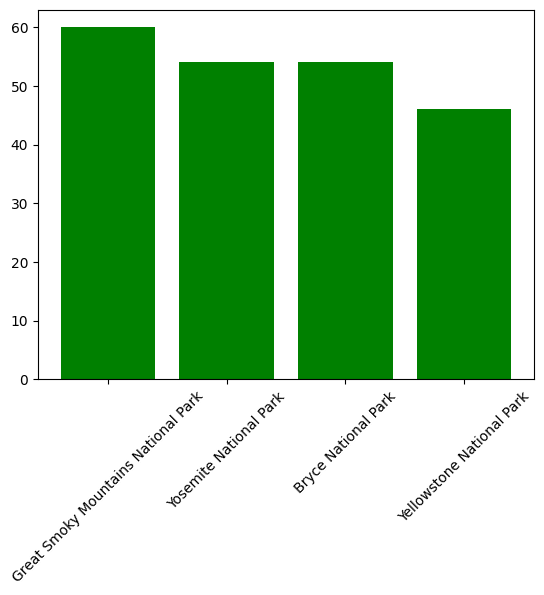

In [5]:

fig, ax = plt.subplots()
plt.bar(mammal_species_park.keys(), mammal_species_park.values(), color='green')

ax.xaxis.set_tick_params(rotation=45)

Now we can try and find the number of observations of each species. To do this we will need to use both dataframes, to translate the animals into their common names for an easier to understand display. We will also need to use their name to find which category each species belongs too, as this isn't in the observations dataframe. 

In [28]:
great_smoky_mountains_species= list(find_species_by_park_and_category('Great Smoky Mountains National Park', 'Mammal'))
great_smoky_mountains_species+= list(find_species_by_park_and_category('Great Smoky Mountains National Park', 'Bird'))
great_smoky_mountains_species+= list(find_species_by_park_and_category('Great Smoky Mountains National Park', 'Reptile'))
great_smoky_mountains_species+= list(find_species_by_park_and_category('Great Smoky Mountains National Park', 'Amphibian'))
great_smoky_mountains_species+= list(find_species_by_park_and_category('Great Smoky Mountains National Park', 'Fish'))

great_smoky_mountains_species = {translate_common_name(animal): observations[(observations['scientific_name'] == animal) & (observations['park_name'] == "Great Smoky Mountains National Park")]['observations'].sum() for animal in great_smoky_mountains_species}

print(great_smoky_mountains_species)

"""The above is a test, to see what process is necessary to find the number of observations of each species in a park."""

{'Eurasian Elk, Moose': 44, 'Yellowstone Moose': 83, 'Antelope, Pronghorn': 119, 'Pallid Bat, Pallid Bat': 61, 'Sierra Nevada Mountain Beaver': 57, 'Ringtail': 76, 'Bison, Buffalo': 117, 'Northern Short Tailed Shrew, Northern Short-Tailed Shrew': 86, 'American Bison, Bison': 77, 'Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle': 56, 'Golden-Mantled Ground Squirrel': 74, 'Coyote': 68, 'Gray Wolf': 59, 'Red Wolf': 13, 'American Beaver, Beaver': 243, 'Wapiti Or Elk': 161, 'California Pocket Mouse': 92, 'Southern Red-Backed Vole': 93, "Gapper's Red-Backed Vole": 98, 'Star-Nosed Mole': 70, "Rafinesque's Big-Eared Bat": 80, "Mule-Eared Bat, Pacific Townsend's Big-Eared Bat, Townsend's Big-Eared Bat, Townsend's Big-Eared Bat, Western Big-Eared Bat, Western Long-Eared Bat, Western Lump-Nosed Bat": 185, 'Least Shrew': 68, 'Virginia Opossum, Virginia Oppossum': 174, 'Big Brown Bat': 146, 'Feral Horse, Horse': 61, 'Common Porcupine, Porcupine': 155, 'Spotted Bat, Spotted Bat': 94, 